Data cleaning, visulalization and feature engineering

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import pandas as pd
df = pd.read_csv('train.csv', header=0)
df_test = pd.read_csv('test.csv', header=0)

df_0 = df.copy()
df_test_0 = df_test.copy()

In [2]:
# df_test.info()
# df_test.head(40)
# df_test.describe()

I observe that the variables Ticket and Cabin PassengeId, Name and Embarcation are irrelevant, therefore I drop them.


In [3]:
df = df.drop(['Cabin', 'Ticket', 'PassengerId', 'Name', 'Embarked'], axis=1)
df_test = df_test.drop(['Cabin', 'Ticket', 'PassengerId', 'Name', 'Embarked'], axis=1)

I change the sex and Embarked into numerical variable

In [4]:
df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df = df.drop(['Sex'], axis=1)
# df.head(5)

df_test['Gender'] = df_test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df_test = df_test.drop(['Sex'], axis=1)

Sum Parch and SibSP into Familiy size
Remove Family size

In [5]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df = df.drop(['SibSp', 'Parch'], axis=1)
# df.head(5)

df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']
df_test = df_test.drop(['SibSp', 'Parch'], axis=1)

Filling the missing ages

In [6]:
import numpy as np

median_ages = np.zeros((2, 3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = df[(df['Gender'] == i) & (df['Pclass'] == j+1)]['Age'].dropna().median()
df['AgeFill'] = df['Age']
df_test['AgeFill'] = df_test['Age']

for i in range(0, 2):
    for j in range(0, 3):
        df.loc[ (df.Age.isnull()) & (df.Gender == i) & (df.Pclass == j+1),'AgeFill'] = median_ages[i, j]
        df_test.loc[ (df_test.Age.isnull()) & (df_test.Gender == i) & (df_test.Pclass == j+1),'AgeFill'] = median_ages[i, j]
# df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

In [7]:
df = df.drop(['Age'], axis=1)

df_test = df_test.drop(['Age'], axis=1)

In [8]:
df.info()
median_ages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Fare          891 non-null float64
Gender        891 non-null int64
FamilySize    891 non-null int64
AgeFill       891 non-null float64
dtypes: float64(2), int64(4)
memory usage: 41.8 KB


array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

Filling the missing fare in the test set

In [9]:
df_test['FareFill'] = df_test['Fare']
df['FareFill'] = df['Fare']

Fare_median = df_test['FareFill'].dropna().median()
df_test.loc[df_test.Fare.isnull(), ['FareFill']] = Fare_median

df_test = df_test.drop(['Fare'], axis=1)
df = df.drop(['Fare'], axis=1)

df_test.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
Pclass        418 non-null int64
Gender        418 non-null int64
FamilySize    418 non-null int64
AgeFill       418 non-null float64
FareFill      418 non-null float64
dtypes: float64(2), int64(3)
memory usage: 16.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Gender        891 non-null int64
FamilySize    891 non-null int64
AgeFill       891 non-null float64
FareFill      891 non-null float64
dtypes: float64(2), int64(4)
memory usage: 41.8 KB


We add the age class feature

In [10]:
df['Age*Class'] = df.AgeFill * df.Pclass
df_test['Age*Class'] = df_test.AgeFill * df_test.Pclass
df_test.head(5)

,Pclass,Gender,FamilySize,AgeFill,FareFill,Age*Class
0,3,1,0,34.5,7.8292,103.5
1,3,0,1,47.0,7.0000,141.0
2,2,1,0,62.0,9.6875,124.0
3,3,1,0,27.0,8.6625,81.0
4,3,0,2,22.0,12.2875,66.0


In [11]:
# df.dtypes
train_data = df.values
test_data = df_test.values
X_train = train_data[0::, 1::]
X_test = test_data[0::, 0::]
Y = train_data[0::, 0]
# train_data

Random forest

Split train into train and crossval

In [12]:
# from sklearn.model_selection import train_test_split

# X_train, X_val, y_train, y_val = train_test_split(X_train, Y, test_size=0.1, random_state=0)

Classification algorithms

In [13]:
# Import the random forest package
from sklearn.ensemble import RandomForestClassifier 

# Create the random forest object which will include all the parameters
# for the fit
forest = RandomForestClassifier(n_estimators = 100)

# Fit the training data to the Survived labels and create the decision trees
forest = forest.fit(train_data[0::, 1::], train_data[0::, 0])

# Take the same decision trees and run it on the test data
output = forest.predict(test_data[0::, 0::])

# Score is 0.70

In [14]:
# Logistic regression basic

from sklearn import linear_model

clf = linear_model.LogisticRegression(C=1e5)
clf = clf.fit(X_train, Y)
output = clf.predict(X_test)

# Score is 0.75

Let's ttry to improve the performance of the algorithm'

In [15]:
# Weight modification

from sklearn import linear_model

clf = linear_model.LogisticRegression(C=1e5, class_weight='balanced')
clf = clf.fit(X_train, Y)
output = clf.predict(X_test)

# Score is 0.71

Analyse data, let's check the covariance between the survivors and the features

In [16]:
from sklearn import preprocessing
train_data_scaled = preprocessing.scale(train_data)
np.cov(np.transpose(train_data_scaled))[0, :]

array([ 1.0011236 , -0.33886135, -0.54396189,  0.01665768, -0.05964631,
        0.25759563, -0.33172898])

In [17]:
df.axes

[RangeIndex(start=0, stop=891, step=1),
 Index(['Survived', 'Pclass', 'Gender', 'FamilySize', 'AgeFill', 'FareFill',
        'Age*Class'],
       dtype='object')]

Plot

/home/mehdi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


{'boxes': [<matplotlib.lines.Line2D at 0x7f6d2878f390>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6d2879be10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6d287a1f98>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6d287a17f0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6d2878fda0>,
  <matplotlib.lines.Line2D at 0x7f6d2870f828>]}

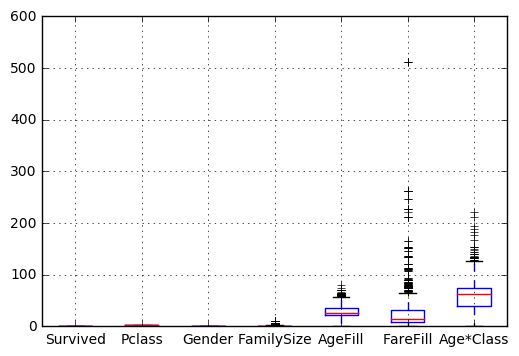

In [18]:
import matplotlib.pyplot as plt
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d2867f2e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6d28431518>]], dtype=object)

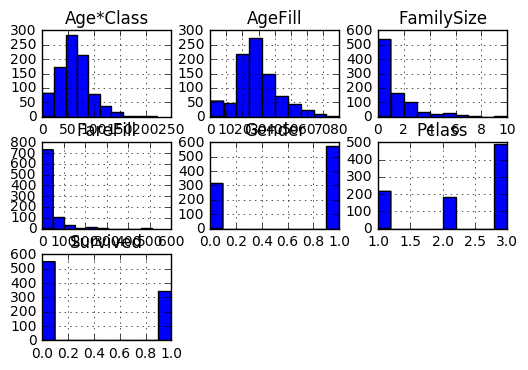

In [19]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d283b2dd8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6d28049b70>]], dtype=object)

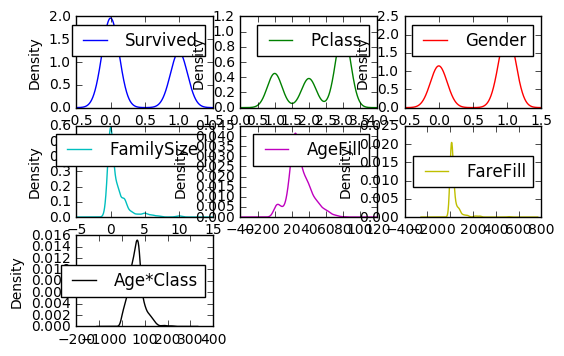

In [20]:
df.plot(kind='density',  sharex=False, subplots=True,  layout=(3,3))

No big variance in FareFill, twice more 3rd class than each other class, gaussian age.
40% survived.

Survived
0    [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
1    [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
dtype: object

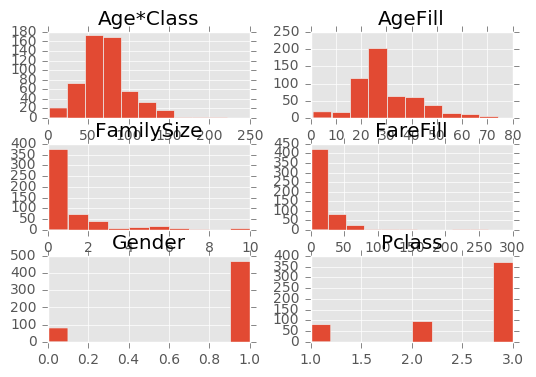

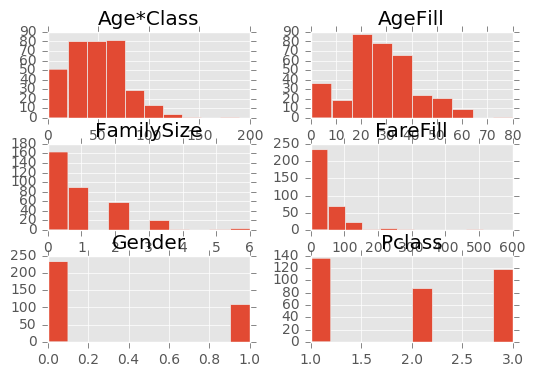

In [21]:
plt.style.use('ggplot')
df.groupby('Survived').hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d2626aef0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6d253b9a20>]], dtype=object)

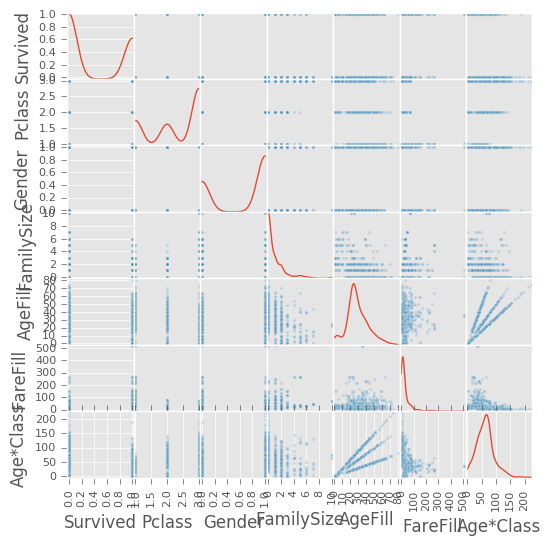

In [22]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

The 1st and 2nd class were closer from the boats le's analyse these classes

Pclass
1    [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
2    [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
3    [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
dtype: object

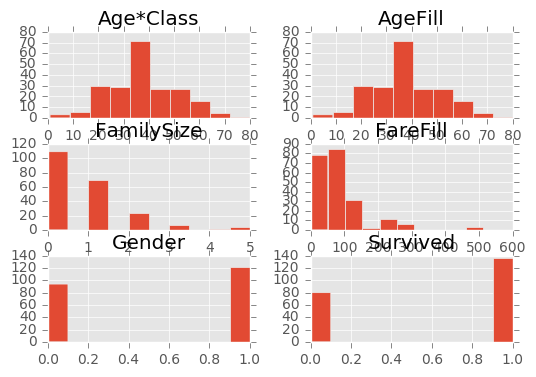

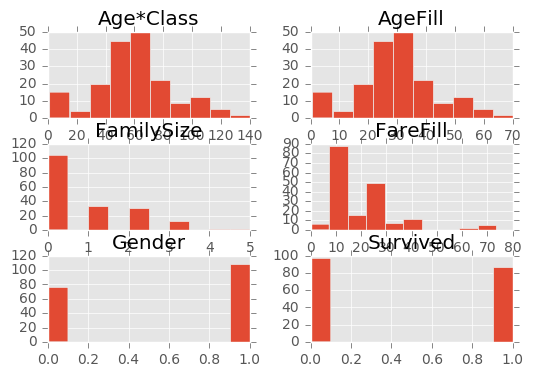

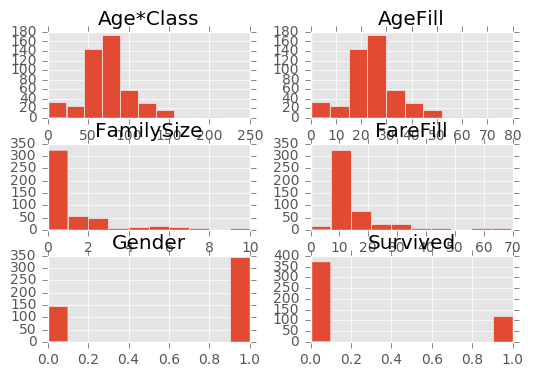

In [23]:
plt.style.use('ggplot')
df.groupby('Pclass').hist()

Women and children were given priority, let's merge them into a class

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d24671470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6d244758d0>]], dtype=object)

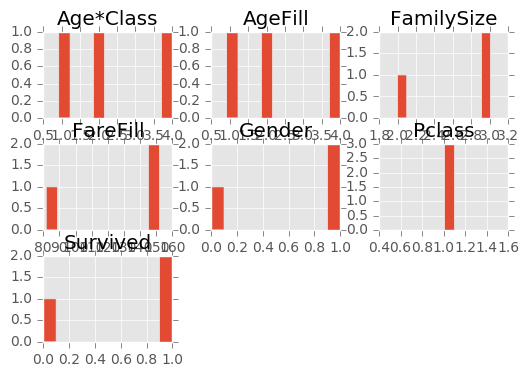

In [24]:
# Merging women and children into one class
# df.loc[((df['Gender'] == 0) | (df['AgeFill'] < 20.)) & (df['Pclass'] == 1 ) ].hist()
#df.loc[(df['Gender'] == 0) & (df['Pclass'] < 2 ) ].hist()
df.loc[(df['AgeFill'] < 10) & (df['Pclass'] < 2 ) ].hist()

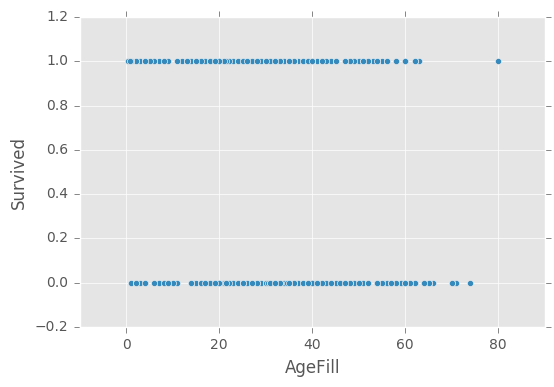

In [25]:
import matplotlib.pyplot as plt
df.plot(x='AgeFill', y='Survived', kind='scatter')
plt.show()

In [26]:
# Neural Network
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(solver='lbfgs', alpha=1e-5,
    hidden_layer_sizes=(4), random_state=1)

nn.fit(X_train, Y)
output = nn.predict(X_test)

# Score 0.73

In [27]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
kmeans.labels_
y_pred_train = kmeans.predict(X_train)

from sklearn.metrics import accuracy_score
accuracy_score(Y, y_pred_train)
kmeans.cluster_centers_

array([[   2.39140811,    0.66587112,    0.86396181,   28.9024463 ,
          22.41194248,   64.52377088],
       [   1.        ,    0.35849057,    1.54716981,   32.43245283,
         187.03285849,   32.43245283]])

We analyse the confusion matrix
Therefore, we split the train into train and validation

In [28]:
from sklearn.model_selection import train_test_split

X_train_0, X_val, Y_train_0, Y_val = train_test_split(X_train, Y, test_size=0.1, random_state=11)

In [29]:
# Logistic regression basic

from sklearn import linear_model

clf = linear_model.LogisticRegression(C=1e5)
clf = clf.fit(X_train_0, Y_train_0)
output = clf.predict(X_val)

# Score is 0.75

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred=output, y_true=Y_val)

array([[55,  2],
       [10, 23]])

Most people who died are well classified, however 30% of the alive people are wrongly classified.

Let's try to set the best hyperparameter for the logistic regression

In [31]:
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

X_train_0, X_val, Y_train_0, Y_val = train_test_split(X_train, Y, test_size=0.1, random_state=np.random.randint(40))

for i in range(0,10):
    clf = linear_model.LogisticRegression(C=pow(10, -i + 5))
    clf = clf.fit(X_train_0, Y_train_0)
    output = clf.predict(X_val)
    print(i)
    print(accuracy_score(y_pred=output, y_true=Y_val))

0
0.866666666667
1
0.866666666667
2
0.866666666667
3
0.866666666667
4
0.866666666667
5
0.855555555556
6
0.844444444444
7
0.755555555556
8
0.744444444444
9
0.733333333333


The best C is for i from 0 to 4

In [32]:
clf = linear_model.LogisticRegression(C=1)
clf = clf.fit(X_train, Y)
output = clf.predict(X_test)

# 0.76

Let's check again the confusion matrix of the random forest

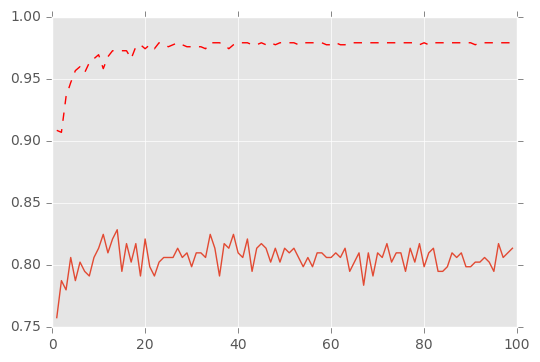

In [33]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train_0, X_val, Y_train_0, Y_val = train_test_split(X_train, Y, test_size=0.3, random_state=np.random.randint(40))


train_accuracy = []
val_accuracy = []

runs = 100

for i in range(1,runs):
    
    forest = RandomForestClassifier(n_estimators = i)
    forest = forest.fit(X_train_0, Y_train_0)
    
    pred_train_0 = forest.predict(X_train_0)
    pred_val_0 = forest.predict(X_val)
    
    train_accuracy.append(accuracy_score(y_pred=pred_train_0, y_true=Y_train_0))
    val_accuracy.append(accuracy_score(y_pred=pred_val_0, y_true=Y_val))

import numpy as np
import matplotlib.pyplot as plt

t = np.arange(1, runs)

# red dashes, blue squares
plt.plot(t,train_accuracy, 'r--', t, val_accuracy, '-')
plt.show()

The model overfits very fast, let's check the confusion matrix for the value of 5

In [34]:
from sklearn.metrics import confusion_matrix

X_train_0, X_val, Y_train_0, Y_val = train_test_split(X_train, Y, test_size=0.1, random_state=np.random.randint(40))

forest = RandomForestClassifier(n_estimators = 5)
forest = forest.fit(X_train_0, Y_train_0)

pred_train_0 = forest.predict(X_train_0)
pred_val_0 = forest.predict(X_val)

confusion_matrix(y_pred=pred_val_0, y_true=Y_val)

array([[55, 12],
       [ 4, 19]])

In [35]:
forest = RandomForestClassifier(n_estimators = 3)
forest = forest.fit(X_train, Y)

output = forest.predict(X_test)

Using linear regression with other features

In [36]:
df_2 = df.copy()
df_test_2 = df_test.copy()

def add_features2(dataframe):
    dataframe['AgeFillSq'] = dataframe['AgeFill'] * dataframe['AgeFill']
    dataframe['FareFillSq'] = dataframe['FareFill'] * dataframe['FareFill']
    dataframe['Age*ClassSq'] = dataframe['Age*Class'] * dataframe['Age*Class']
    
add_features2(df_2)
add_features2(df_test_2)

In [37]:
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split



def prediction_accuracy(dataframe, dataframe_test):
    train_data = dataframe.values
    test_data = dataframe_test.values
    X_train = train_data[0::, 1::]
    X_test = test_data[0::, 0::]
    Y = train_data[0::, 0]  
    
    X_train_0, X_val, Y_train_0, Y_val = train_test_split(X_train, Y, test_size=0.1, random_state=40)
    clf = linear_model.LogisticRegression(C=1)
    clf = clf.fit(X_train_0, Y_train_0)
    pred_val = clf.predict(X_val)
    return accuracy_score(y_pred=pred_val, y_true=Y_val)

print(prediction_accuracy(df_2, df_test_2))
print(prediction_accuracy(df, df_test))

0.811111111111
0.822222222222


The dataset is small using many features is not a good idea, let's consider the squares only

In [38]:
def drop_features2(dataframe):
    dataframe = dataframe.drop(['AgeFill','FareFill', 'Age*Class'], axis=1)

drop_features2(df_2)
drop_features2(df_test_2)

print(prediction_accuracy(df_2, df_test_2))
print(prediction_accuracy(df, df_test))

0.811111111111
0.822222222222


No difference, let's drop more features

In [39]:
df_3 = df.copy()
df_test_3 = df_test.copy()

df_3 = df_3.drop(['AgeFill'], axis=1)
df_test_3 = df_test_3.drop(['AgeFill'], axis=1)

print(prediction_accuracy(df_3, df_test_3))
print(prediction_accuracy(df, df_test))

df_test.head()

0.833333333333
0.822222222222


,Pclass,Gender,FamilySize,AgeFill,FareFill,Age*Class
0,3,1,0,34.5,7.8292,103.5
1,3,0,1,47.0,7.0000,141.0
2,2,1,0,62.0,9.6875,124.0
3,3,1,0,27.0,8.6625,81.0
4,3,0,2,22.0,12.2875,66.0


0.1 improvement by dropping AgeFill feature

Survived
0    [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
1    [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
dtype: object

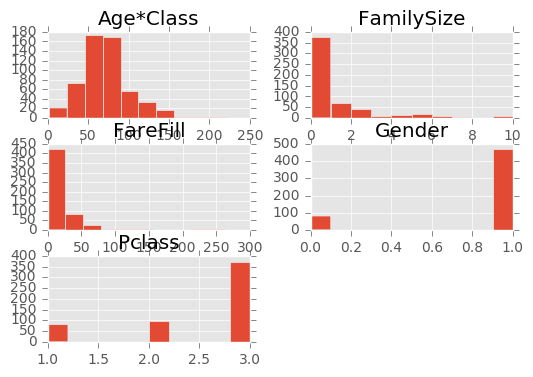

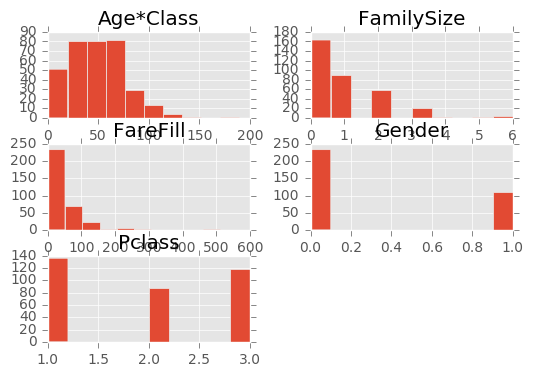

In [40]:
df_3.groupby('Survived').hist()

From the histogram FareFill doesn't seem to be discriminant, therefore in order to decrease overfitting, I will drop it.

In [41]:
df_4 = df_3.copy()
df_test_4 = df_test_3.copy()

df_4 = df_4.drop(['FareFill'], axis=1)
df_test_4 = df_test_4.drop(['FareFill'], axis=1)

print(prediction_accuracy(df_3, df_test_3))
print(prediction_accuracy(df_4, df_test_4))

df_test_4.head()

0.833333333333
0.822222222222


,Pclass,Gender,FamilySize,Age*Class
0,3,1,0,103.5
1,3,0,1,141.0
2,2,1,0,124.0
3,3,1,0,81.0
4,3,0,2,66.0


Less good results now a new approach to dimension reduction, PCA

In [42]:
from sklearn.decomposition import PCA

def pca_transform(X_train, X_test):
    pca = PCA(n_components=3)
    pca.fit(X_train)
    X_train_reducted = pca.fit_transform(X_train)
    X_test_reducted = pca.fit_transform(X_test)
    return X_train_reducted, X_test_reducted
X_train_reducted, X_test_reducted = pca_transform(X_train, X_test)

In [43]:
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

clf = linear_model.LogisticRegression(C=pow(10, -i + 5))
clf = clf.fit(X_train_reducted, Y)
output = clf.predict(X_test_reducted)

The dataset is small let's clean it from the outliers, based on the previous histograms, let's remove the farefill over 60

In [44]:
df_4 = df.copy()
df_test_4 = df_test.copy()
df_4 = df_4.loc[(df['FareFill'] < 60)]

print(prediction_accuracy(df_4, df_test_4))
print(prediction_accuracy(df, df_test))

0.753246753247
0.822222222222


The results are much worse,

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split

# train the model
clf = GaussianNB()
clf.fit(X_train, Y)

# use the model to predict the labels of the test data
output = clf.predict(X_test)

/home/mehdi/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Let's use the new package seaborn to understand better the data

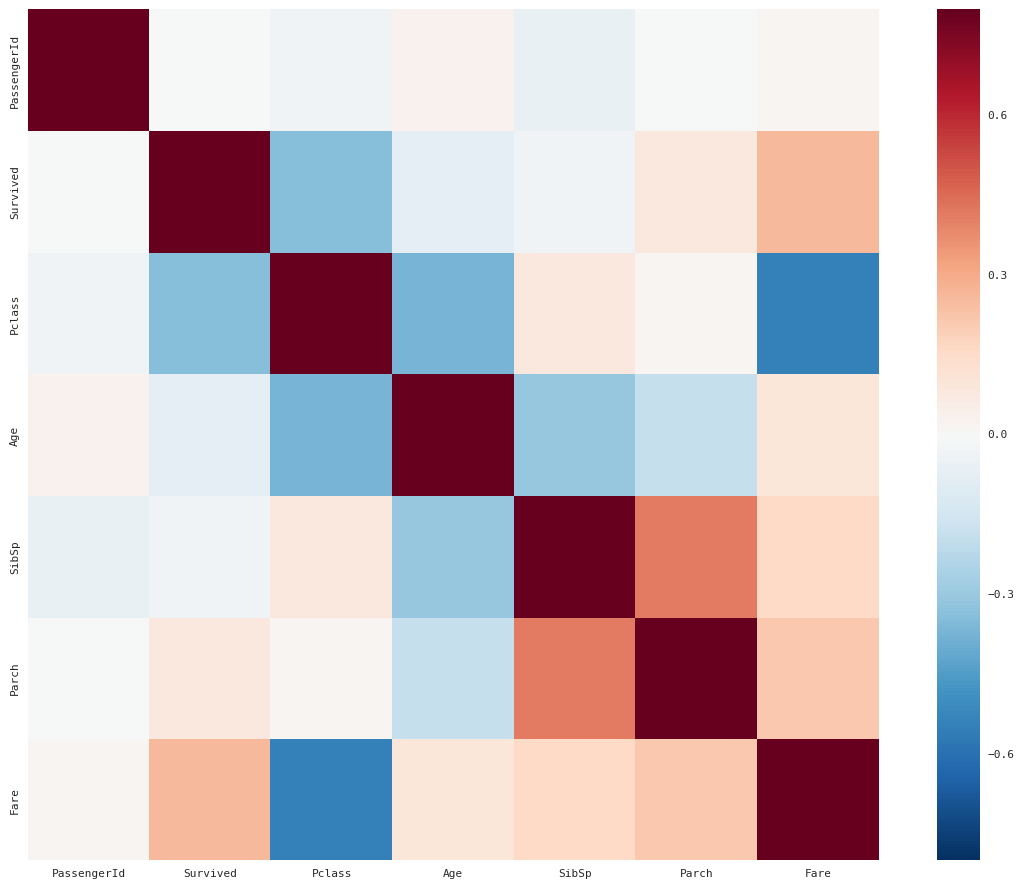

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="paper", font="monospace")

# Load the datset of correlations between cortical brain networks
corrmat = df_0.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

f.tight_layout()

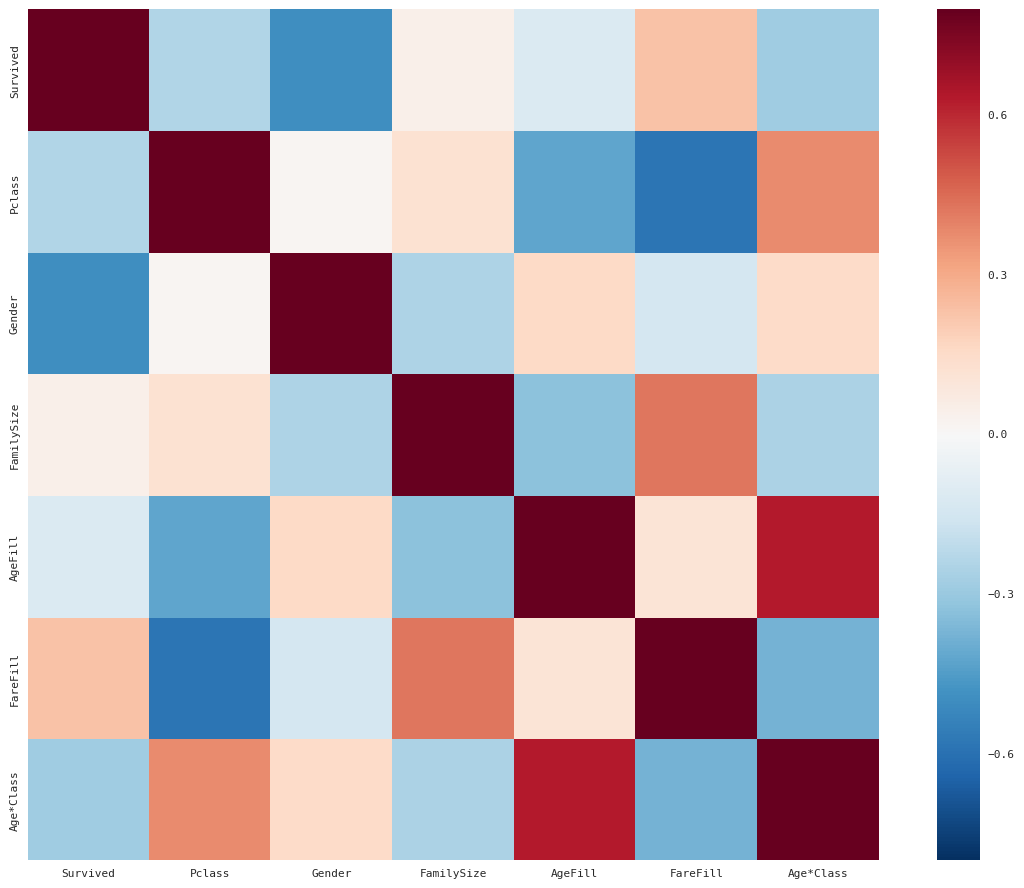

In [49]:
# Load the datset of correlations between cortical brain networks
corrmat = df_4.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

f.tight_layout()

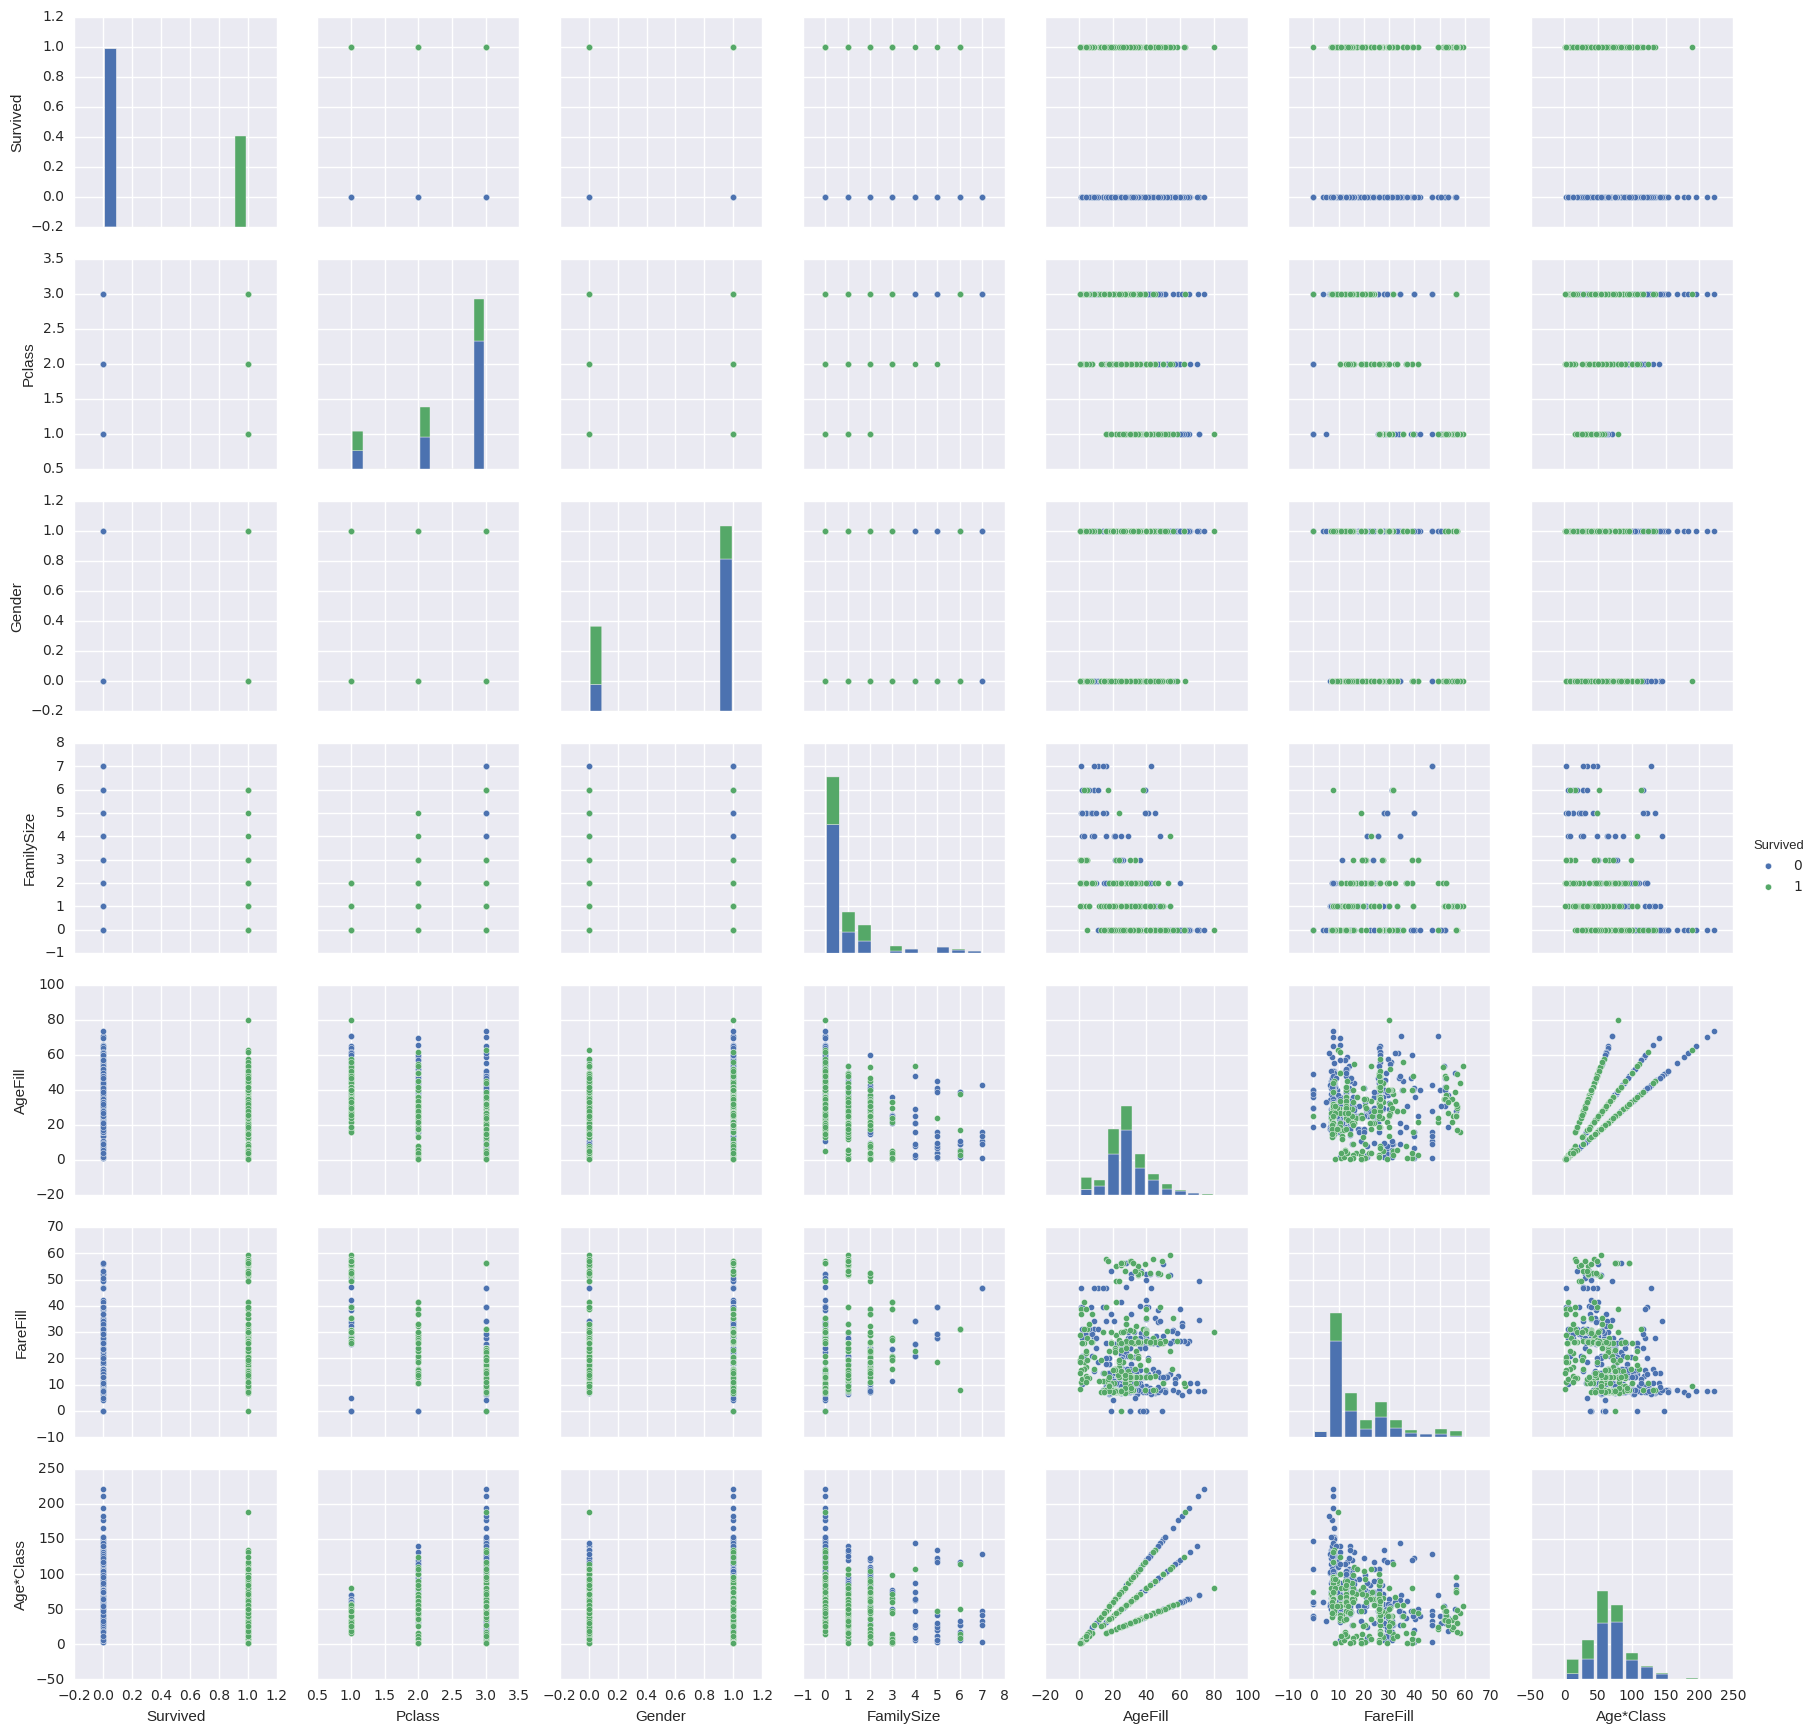

In [51]:
import seaborn as sns
sns.set()

sns.pairplot(df_4, hue="Survived")

In [64]:
output = output.astype(int)
passenger_id = np.arange(892, 1310, 1)
prediction = np.vstack((passenger_id, output)).transpose()
names = ['PassengerId', 'Survived']
df = pd.DataFrame(prediction, index=passenger_id, columns=names)
df.head(3)
df.to_csv('PCA_logistic_regression.csv', index=False, header=True, sep=',')